1. Biểu diễn dữ liệu

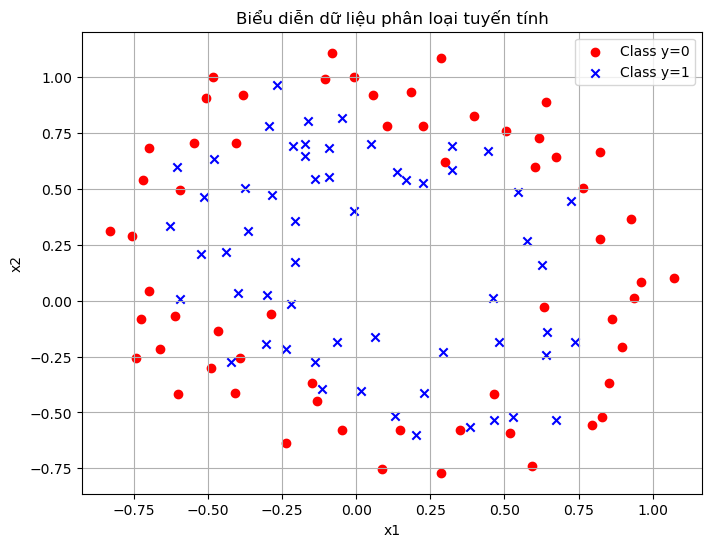

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data5.txt", header=None)
df.columns = ['x1', 'x2', 'y']

x1 = df['x1'].values
x2 = df['x2'].values
y = df['y'].values

x1_col = x1.reshape(-1, 1)  # (n,1)
x2_col = x2.reshape(-1, 1)  # (n,1)

x1_0 = x1[y == 0]
x2_0 = x2[y == 0]
x1_1 = x1[y == 1]
x2_1 = x2[y == 1]

plt.figure(figsize=(8, 6))
plt.scatter(x1_0, x2_0, color='red', marker='o', label='Class y=0')
plt.scatter(x1_1, x2_1, color='blue', marker='x', label='Class y=1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Biểu diễn dữ liệu phân loại tuyến tính')
plt.legend()
plt.grid(True)
plt.show()

2. Mô hình dữ liệu x theo dạng bậc 6 hai biến như hình bên cạnh

In [88]:
def mapFeature(x1, x2, degree=6):
    if isinstance(x1, pd.Series):
        x1 = x1.to_numpy()
    if isinstance(x2, pd.Series):
        x2 = x2.to_numpy()
    out = [np.ones(x1.shape[0])]
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((x1 ** (i - j)) * (x2 ** j))
    return np.stack(out, axis=1)

In [89]:
print(X_mapped)

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


3. Chuẩn hóa dữ liệu

In [90]:
X_mapped = mapFeature(x1, x2)
X_norm = X_mapped.copy()
mu = np.mean(X_mapped[:, 1:], axis=0)
sigma = np.std(X_mapped[:, 1:], axis=0)
sigma[sigma == 0] = 1  # tránh chia cho 0
X_norm[:, 1:] = (X_mapped[:, 1:] - mu) / sigma

In [91]:
print(X_norm)

[[ 1.00000000e+00 -7.10129423e-03  9.97918051e-01 ... -5.07389306e-01
   1.65025207e-01 -2.88621467e-02]
 [ 1.00000000e+00 -2.98296321e-01  9.69668805e-01 ... -4.78196976e-01
  -8.51015614e-02 -7.61210609e-02]
 [ 1.00000000e+00 -5.42901033e-01  9.83793428e-01 ... -2.79624572e-01
  -3.06658749e-01 -5.31152456e-02]
 ...
 [ 1.00000000e+00 -1.09035391e+00  1.57702761e+00 ...  4.88429471e+00
  -5.27929869e+00  2.94699510e+00]
 [ 1.00000000e+00 -1.23578900e-01  1.57702761e+00 ... -5.21006986e-01
  -1.27422727e-04  2.94699510e+00]
 [ 1.00000000e+00  1.16849077e+00 -4.12944396e-01 ... -5.21923737e-01
   6.98368090e-02 -4.25924493e-01]]


4. Viết chương trình cho phép học các tham số của mô hình phân loại phi tuyến trên

In [92]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def computeCost(X_norm, y, theta):
    m = len(y)
    h = sigmoid(X_norm @ theta)
    epsilon = 1e-5
    return -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

def computeGradient(X_norm, y, theta):
    m = len(y)
    h = sigmoid(X_norm @ theta)
    return (1/m) * (X_norm.T @ (h - y))

def gradientDescent(X_norm, y, alpha=0.1, num_iters=500):
    m, n = X_norm.shape
    theta = np.zeros(n)
    J_history = []
    for i in range(num_iters):
        grad = computeGradient(X_norm, y, theta)
        theta -= alpha * grad
        cost = computeCost(X_norm, y, theta)
        J_history.append(cost)
    return theta, J_history

5. Tính J ở mỗi vòng lặp, và vẽ biểu đồ J ở các giá trị learning rate khác nhau sau khi chạy hết các vòng lặp.

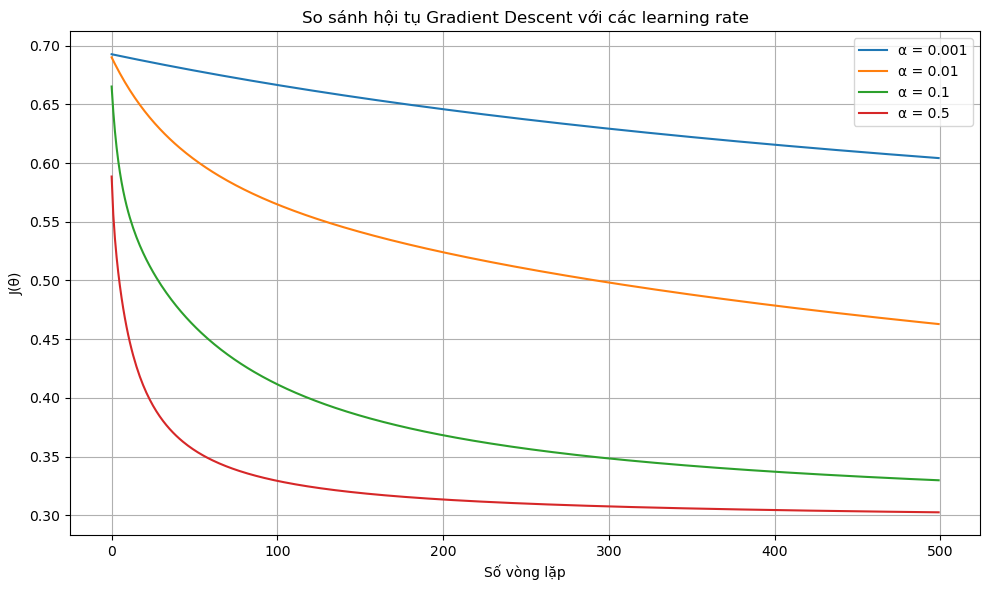

In [ ]:
y = y.reshape(-1)
learning_rates = [0.001, 0.01, 0.1, 0.5]
num_iters = 500
histories = {}

for alpha in learning_rates:
    _, J_hist = gradientDescent(X_norm, y, alpha=alpha, num_iters=num_iters)
    histories[alpha] = J_hist

plt.figure(figsize=(10, 6))
for alpha in learning_rates:
    plt.plot(histories[alpha], label=f'α = {alpha}')
plt.xlabel('Số vòng lặp')
plt.ylabel('J(θ)')
plt.title('So sánh hội tụ Gradient Descent với các learning rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\PHONGPHAM\AppData\Local\Temp\ipykernel_15988\3801149600.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\PHONGPHAM\AppData\Local\Temp\ipykernel_15988\466342995.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z_vals[i, j] = sigmoid(mapped @ theta)


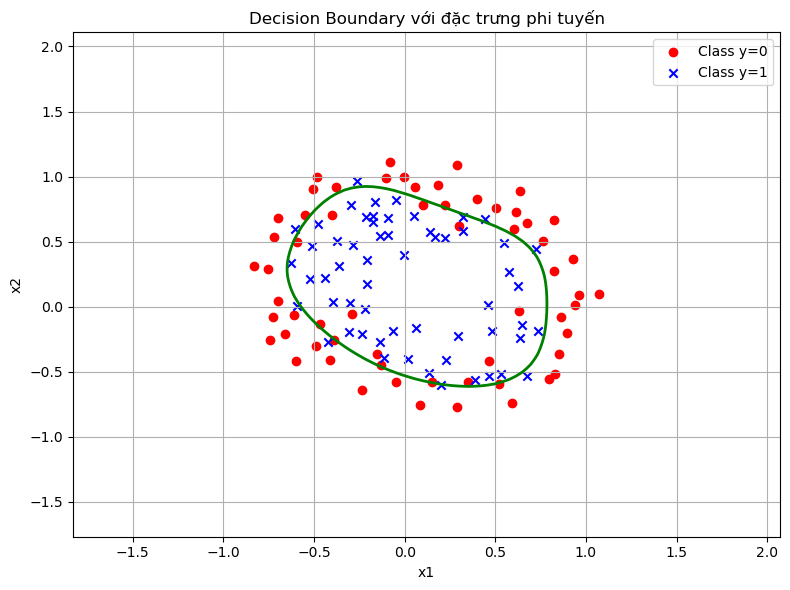

In [94]:
# Huấn luyện lại với learning rate tốt nhất (0.1)
theta, _ = gradientDescent(X_norm, y, alpha=0.1, num_iters=500)

# Vẽ lại dữ liệu
plt.figure(figsize=(8, 6))
plt.scatter(x1_0, x2_0, color='red', marker='o', label='Class y=0')
plt.scatter(x1_1, x2_1, color='blue', marker='x', label='Class y=1')

# Tạo lưới điểm để vẽ đường ranh giới quyết định
u_vals = np.linspace(x1.min() - 1, x1.max() + 1, 100)
v_vals = np.linspace(x2.min() - 1, x2.max() + 1, 100)
z_vals = np.zeros((len(u_vals), len(v_vals)))

# Duyệt từng điểm trong lưới và tính giá trị dự đoán
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        mapped = mapFeature(np.array([u_vals[i]]), np.array([v_vals[j]]))
        mapped[:, 1:] = (mapped[:, 1:] - mu) / sigma  # chuẩn hóa như trước
        z_vals[i, j] = sigmoid(mapped @ theta)

# Vẽ đường ranh giới quyết định tại ngưỡng 0.5
U, V = np.meshgrid(u_vals, v_vals)
plt.contour(U, V, z_vals.T, levels=[0.5], colors='green', linewidths=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary với đặc trưng phi tuyến')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
